In [1]:
import acquire as a

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Acquire/Visualize:

In [2]:
# 1. Acquisition of zillow data given the needed parameters
zillow = a.acquire_zillow()

Using cached csv


In [3]:
zillow.head()
zillow = zillow.drop(columns='id')

In [4]:
zillow.shape

(77574, 67)

In [5]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77574 entries, 0 to 77573
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77574 non-null  int64  
 1   airconditioningtypeid         25006 non-null  float64
 2   architecturalstyletypeid      206 non-null    float64
 3   basementsqft                  50 non-null     float64
 4   bathroomcnt                   77574 non-null  float64
 5   bedroomcnt                    77574 non-null  float64
 6   buildingclasstypeid           15 non-null     float64
 7   buildingqualitytypeid         49808 non-null  float64
 8   calculatedbathnbr             76959 non-null  float64
 9   decktypeid                    614 non-null    float64
 10  finishedfloor1squarefeet      6035 non-null   float64
 11  calculatedfinishedsquarefeet  77374 non-null  float64
 12  finishedsquarefeet12          73919 non-null  float64
 13  f

In [6]:
zillow.isnull().sum().sort_values(ascending=False)[:50]

buildingclasstypeid             77559
buildingclassdesc               77559
finishedsquarefeet13            77532
basementsqft                    77524
storydesc                       77524
storytypeid                     77524
yardbuildingsqft26              77504
fireplaceflag                   77402
architecturalstyletypeid        77368
architecturalstyledesc          77368
typeconstructiontypeid          77352
typeconstructiondesc            77352
finishedsquarefeet6             77188
pooltypeid10                    77109
decktypeid                      76960
poolsizesum                     76705
pooltypeid2                     76500
hashottuborspa                  76035
yardbuildingsqft17              75181
taxdelinquencyflag              74674
taxdelinquencyyear              74674
finishedsquarefeet15            74547
finishedsquarefeet50            71539
finishedfloor1squarefeet        71539
fireplacecnt                    69287
threequarterbathnbr             67469
pooltypeid7 

In [6]:
# Let's do some visualizations
def plot_cats_and_cons(df, conts, cats):
    for col in conts:
        sns.displot(x=col, data=df, kind='kde')
        plt.show()
        sns.boxplot(df[col])
        plt.show()
        sns.histplot(df[col])
        plt.show()
    for col in cats:
        sns.countplot(x=col, data=df)
        plt.show()

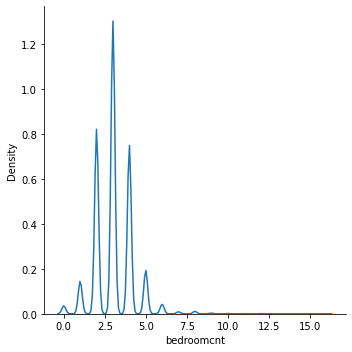

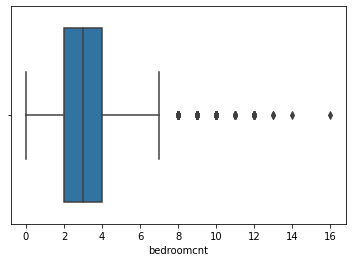

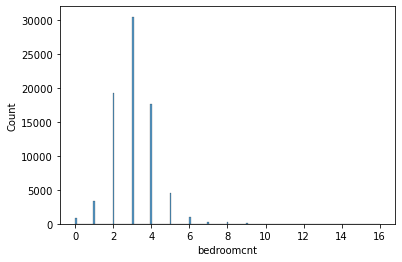

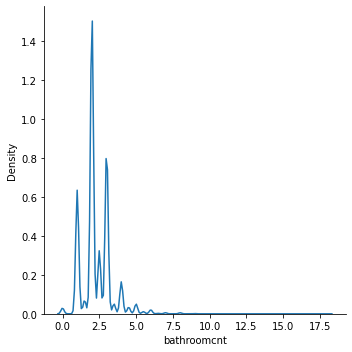

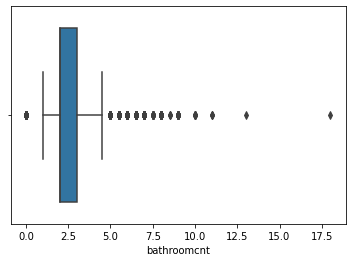

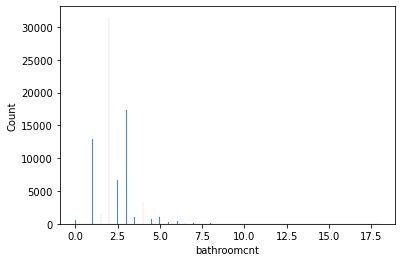

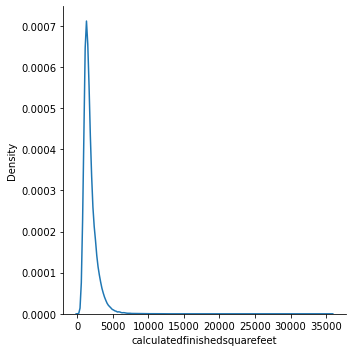

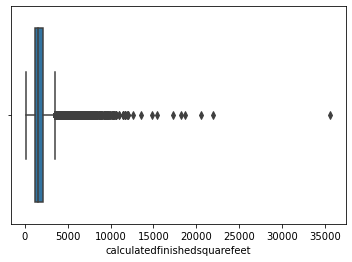

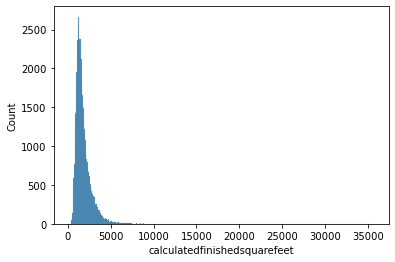

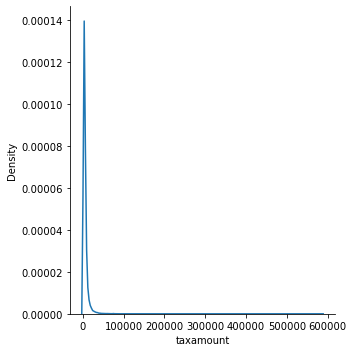

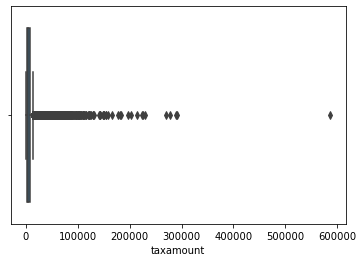

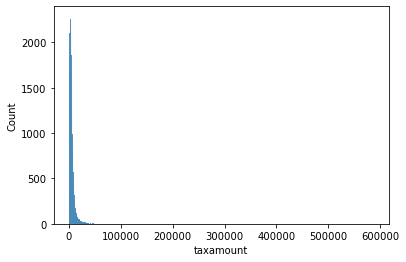

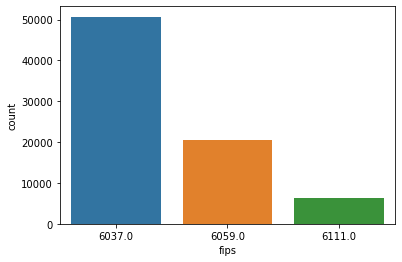

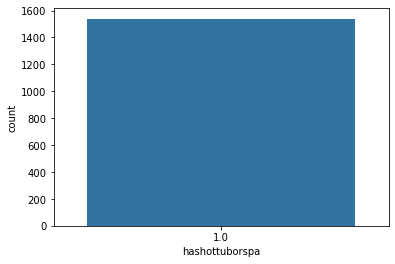

In [7]:
conts = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxamount']
cats = ['fips', 'hashottuborspa']
plot_cats_and_cons(zillow, conts, cats)

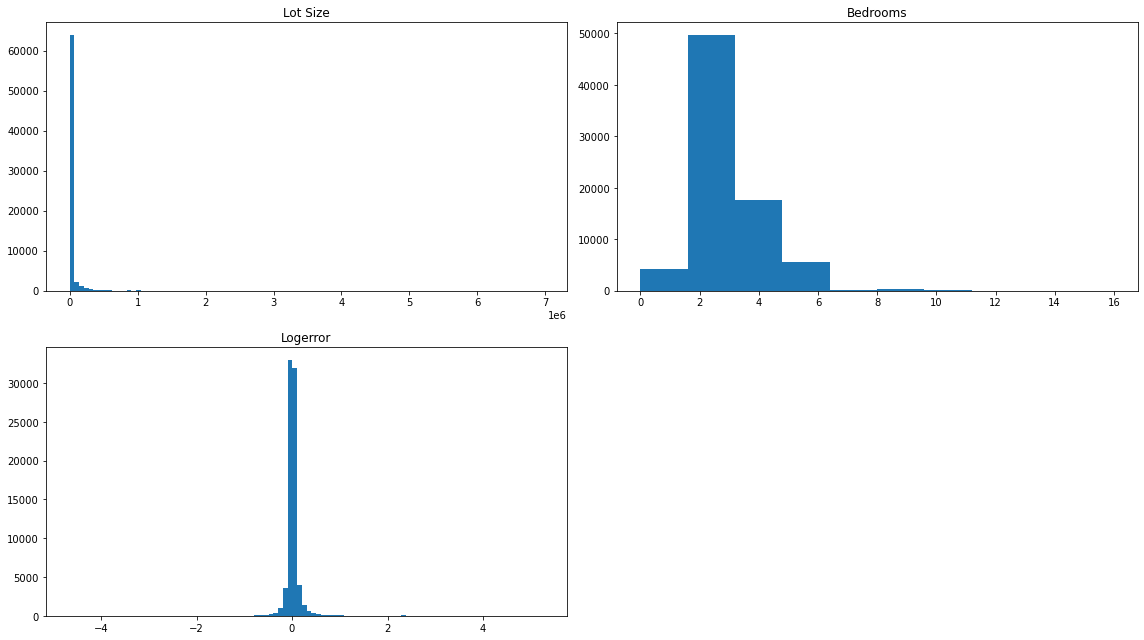

In [8]:
plt.figure(figsize=(16,9))
plt.subplot(221)
plt.hist(zillow.lotsizesquarefeet, bins= 100)
plt.title('Lot Size')

plt.subplot(222)
plt.hist(zillow.bedroomcnt, bins=10)
plt.title('Bedrooms')

plt.subplot(223)
plt.hist(zillow.logerror, bins = 100)
plt.title('Logerror')

plt.tight_layout()

In [9]:
zillow.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,7.757400e+04,25006.000000,206.000000,50.000000,77574.000000,77574.000000,15.000000,49808.000000,76959.000000,614.0,...,17596.000000,172.0,7.745900e+04,7.757300e+04,77574.0,7.757200e+04,77569.000000,2900.000000,7.732700e+04,77574.000000
mean,1.300630e+07,1.812045,7.388350,679.720000,2.298521,3.053252,3.933333,6.533830,2.316389,66.0,...,1.434246,1.0,1.892829e+05,4.901477e+05,2016.0,3.011468e+05,5995.855691,14.088276,6.049666e+13,0.016805
std,3.478043e+06,2.965823,2.734542,689.703546,0.996706,1.140447,0.258199,1.722041,0.979690,0.0,...,0.544518,0.0,2.304149e+05,6.538059e+05,0.0,4.927317e+05,7628.912331,2.181281,1.533386e+12,0.170742
min,1.071186e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,66.0,...,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,1.153819e+07,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,2.000000,66.0,...,1.000000,1.0,8.418200e+04,2.068980e+05,2016.0,8.529200e+04,2712.610000,14.000000,6.037311e+13,-0.024310
50%,1.253050e+07,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,2.000000,66.0,...,1.000000,1.0,1.364070e+05,3.588790e+05,2016.0,2.031810e+05,4448.300000,15.000000,6.037603e+13,0.006673
75%,1.421124e+07,1.000000,7.000000,796.500000,3.000000,4.000000,4.000000,8.000000,3.000000,66.0,...,2.000000,1.0,2.187340e+05,5.690000e+05,2016.0,3.667610e+05,6926.820000,15.000000,6.059042e+13,0.039292
max,1.676893e+08,13.000000,21.000000,3560.000000,18.000000,16.000000,4.000000,12.000000,18.000000,66.0,...,6.000000,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999


3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [5]:
def nulls_col(df):
    nulls = pd.DataFrame({
        'count_nulls': df.isna().sum(),
        'pct_rows_null': df.isna().mean()
    })
    return nulls

In [6]:
nulls = nulls_col(zillow)

In [7]:
nulls.sort_values(by='pct_rows_null', ascending=False).head(50)

,count_nulls,pct_rows_null
buildingclasstypeid,77559,0.999807
buildingclassdesc,77559,0.999807
finishedsquarefeet13,77532,0.999459
basementsqft,77524,0.999355
storydesc,77524,0.999355
storytypeid,77524,0.999355
yardbuildingsqft26,77504,0.999098
fireplaceflag,77402,0.997783
architecturalstyletypeid,77368,0.997344
architecturalstyledesc,77368,0.997344


4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [8]:
def cols_missing(df):
    df2 = pd.DataFrame(df.isnull().sum(axis=1), columns = ['num_cols_missing']).reset_index()\
    .groupby('num_cols_missing').count().reset_index().\
    rename(columns = {'index': 'num_rows'})
    df2['pct_cols_missing'] = df2.num_cols_missing/df.shape[1]
    return df2

In [9]:
def cols_missing2(df):
    df2 = pd.concat([
    df.isna().sum(axis=1).rename('n_missing'),
    df.isna().mean(axis=1).rename('percent_missing'),
], axis=1).value_counts().sort_index()
    return df2

In [10]:
cols_missing(zillow)

,num_cols_missing,num_rows,pct_cols_missing
0,23,2,0.343284
1,24,13,0.358209
2,25,24,0.373134
3,26,65,0.388060
4,27,316,0.402985
5,28,457,0.417910
6,29,5285,0.432836
7,30,3465,0.447761
8,31,9911,0.462687
9,32,12606,0.477612


In [11]:
cols_missing2(zillow)

n_missing  percent_missing
23         0.343284               2
24         0.358209              13
25         0.373134              24
26         0.388060              65
27         0.402985             316
28         0.417910             457
29         0.432836            5285
30         0.447761            3465
31         0.462687            9911
32         0.477612           12606
33         0.492537           14817
34         0.507463           13356
35         0.522388            5163
36         0.537313            5793
37         0.552239            3630
38         0.567164            1932
39         0.582090             285
40         0.597015             230
41         0.611940              29
42         0.626866              26
43         0.641791              29
44         0.656716              79
45         0.671642              50
46         0.686567               5
47         0.701493               3
48         0.716418               3
dtype: int64

## Prepare:

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [17]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77574 entries, 0 to 77573
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77574 non-null  int64  
 1   airconditioningtypeid         25006 non-null  float64
 2   architecturalstyletypeid      206 non-null    float64
 3   basementsqft                  50 non-null     float64
 4   bathroomcnt                   77574 non-null  float64
 5   bedroomcnt                    77574 non-null  float64
 6   buildingclasstypeid           15 non-null     float64
 7   buildingqualitytypeid         49808 non-null  float64
 8   calculatedbathnbr             76959 non-null  float64
 9   decktypeid                    614 non-null    float64
 10  finishedfloor1squarefeet      6035 non-null   float64
 11  calculatedfinishedsquarefeet  77374 non-null  float64
 12  finishedsquarefeet12          73919 non-null  float64
 13  f

In [18]:
zillow.censustractandblock.value_counts()

6.037137e+13    60
6.037277e+13    51
6.059032e+13    44
6.037920e+13    41
6.059063e+13    41
                ..
6.037406e+13     1
6.037430e+13     1
6.037604e+13     1
6.037187e+13     1
6.037503e+13     1
Name: censustractandblock, Length: 39006, dtype: int64

In [20]:
zillow.garagecarcnt.value_counts().head(40)

2.0     18637
1.0      5689
3.0       632
4.0       256
0.0       230
5.0        45
6.0        14
7.0         4
10.0        3
8.0         2
9.0         2
11.0        1
13.0        1
14.0        1
Name: garagecarcnt, dtype: int64

In [21]:
zillow.unitcnt.value_counts(dropna = False)

1.0      47412
NaN      26872
2.0       2031
4.0        726
3.0        529
45.0         1
42.0         1
6.0          1
237.0        1
Name: unitcnt, dtype: int64

In [22]:
zillow.propertylandusetypeid.value_counts()

261.0    52438
266.0    19341
246.0     2021
269.0     1947
248.0      729
247.0      539
265.0      335
263.0       74
275.0       59
260.0       41
267.0       29
31.0        15
264.0        6
Name: propertylandusetypeid, dtype: int64

In [5]:
# Identifying which landusetypeid are not single units
not_single = [246, 248, 247, 267, 31]

In [6]:
zillow2 = zillow.copy()

In [19]:
zillow2 = zillow2[~zillow.propertylandusetypeid.isin(not_single)] 

In [21]:
zillow2.propertylandusetypeid.value_counts()

261.0    52438
266.0    19341
269.0     1947
265.0      335
263.0       74
275.0       59
260.0       41
264.0        6
Name: propertylandusetypeid, dtype: int64

In [7]:
# Making sure properties has at least one bathroom, one bedroom, unitcnt
zillow2 = zillow2[(zillow2.bedroomcnt > 0) & (zillow2.bathroomcnt > 0) & ((zillow2.unitcnt <= 1) | zillow2.unitcnt.isnull())]

In [20]:
zillow2.shape

(45931, 30)

In [9]:
zillow2.calculatedfinishedsquarefeet[zillow.calculatedfinishedsquarefeet < 400].value_counts(ascending = False, dropna=False).head(50)

360.0    4
380.0    2
300.0    1
242.0    1
326.0    1
384.0    1
372.0    1
378.0    1
152.0    1
Name: calculatedfinishedsquarefeet, dtype: int64

In [10]:
# Dropping insanely low sqft 
zillow2 = zillow2[zillow2.calculatedfinishedsquarefeet > 300]

In [11]:
zillow2.shape

(73736, 67)

In [12]:
zil_dupes = zillow2[zillow2.parcelid.value_counts() > 1]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [13]:
zillow2.shape

(73736, 67)

In [14]:
# Have duplicate parcelids
zillow2.drop_duplicates(subset = 'parcelid', inplace=True)

In [15]:
zillow2.shape

(73569, 67)

In [16]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    n_required_column = round(df.shape[0] * prop_required_column)
    n_required_row = round(df.shape[1] * prop_required_row)
    df = df.dropna(axis=0, thresh=n_required_row)
    df = df.dropna(axis=1, thresh=n_required_column)
    return df

In [17]:
zillow2 = handle_missing_values(zillow2, prop_required_column=.5, prop_required_row=.5)

In [18]:
zillow2.shape

(45971, 30)

^^^ The above done after initial null culling will result in losing more of the data than necessarily intended bc you are now trimming already trimmed data with a 50% metric. (That 50% is now applied to already pruned, meaning you are now causing over-pruning than if 'handle-missing-values()' was done first. 

In [25]:
zillow_trim.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
3,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,2.0,34245180.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential
4,10887214,3.0,3.0,3.0,1312.0,1312.0,6037.0,3.0,2.0,34185120.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Central,Condominium
6,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,2.0,34145202.0,...,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Central,Single Family Residential
9,11542646,3.0,2.0,3.0,1290.0,1290.0,6037.0,3.0,2.0,33998800.0,...,151303.0,371361.0,2016.0,220058.0,4557.32,6.037275e+13,-0.036763,2017-01-02,Central,Condominium
10,11104527,3.0,4.0,3.0,2540.0,2540.0,6037.0,3.0,2.0,34434971.0,...,271715.0,430108.0,2016.0,158393.0,6103.36,6.037920e+13,0.005963,2017-01-02,Central,Single Family Residential


In [22]:
zillow_trim = zillow2.dropna()

In [23]:
zillow_trim.shape

(35214, 30)

In [26]:
zillow_trim = zillow_trim[['fips', 'taxvaluedollarcnt', 'logerror']]

In [27]:
zillow_trim.fips.value_counts()

6037.0    34648
6059.0      566
Name: fips, dtype: int64

In [31]:
zillow_trim_6307 = zillow_trim[zillow_trim.fips == 6037]

In [32]:
zillow_trim_6307.shape

(34648, 3)

In [33]:
zillow_trim_6307.head()

,fips,taxvaluedollarcnt,logerror
3,6037.0,145143.0,-0.103410
4,6037.0,119407.0,0.006940
6,6037.0,773303.0,-0.001011
9,6037.0,371361.0,-0.036763
10,6037.0,430108.0,0.005963


array([[<AxesSubplot:title={'center':'fips'}>,
        <AxesSubplot:title={'center':'taxvaluedollarcnt'}>],
       [<AxesSubplot:title={'center':'logerror'}>, <AxesSubplot:>]],
      dtype=object)

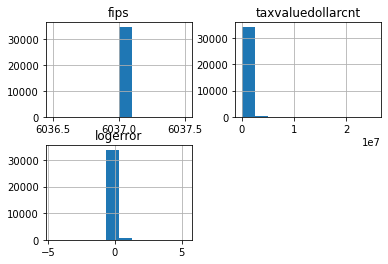

In [34]:
zillow_trim_6307.hist()

In [35]:
zillow_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35214 entries, 3 to 77572
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fips               35214 non-null  float64
 1   taxvaluedollarcnt  35214 non-null  float64
 2   logerror           35214 non-null  float64
dtypes: float64(3)
memory usage: 1.1 MB


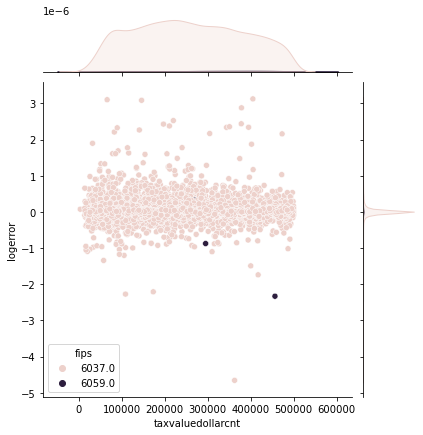

In [40]:
sns.jointplot(x='taxvaluedollarcnt', y='logerror', data=(zillow_trim[zillow_trim.taxvaluedollarcnt < 500000]), hue='fips')

,fips,taxvaluedollarcnt,logerror
3,6037.0,145143.0,-0.103410
4,6037.0,119407.0,0.006940
6,6037.0,773303.0,-0.001011
9,6037.0,371361.0,-0.036763
10,6037.0,430108.0,0.005963


In [42]:
zillow_trim = zillow2.dropna()

In [43]:
zillow_trim.shape

(35214, 30)

In [46]:
zillow_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35214 entries, 3 to 77572
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      35214 non-null  int64  
 1   bathroomcnt                   35214 non-null  float64
 2   bedroomcnt                    35214 non-null  float64
 3   calculatedbathnbr             35214 non-null  float64
 4   calculatedfinishedsquarefeet  35214 non-null  float64
 5   finishedsquarefeet12          35214 non-null  float64
 6   fips                          35214 non-null  float64
 7   fullbathcnt                   35214 non-null  float64
 8   heatingorsystemtypeid         35214 non-null  float64
 9   latitude                      35214 non-null  float64
 10  longitude                     35214 non-null  float64
 11  lotsizesquarefeet             35214 non-null  float64
 12  propertycountylandusecode     35214 non-null  object 
 13  p

In [110]:
zillow_2.reigionidzip.head()

AttributeError: 'DataFrame' object has no attribute 'reigionidzip'

In [74]:
zillow_trim.regionidzip.value_counts(ascending = False).head(60)

97319.0    709
97318.0    585
97329.0    551
97328.0    458
96368.0    423
96389.0    399
96378.0    385
96370.0    372
96364.0    372
96401.0    371
96505.0    354
96030.0    354
97330.0    352
96236.0    332
96242.0    318
96349.0    313
96369.0    300
96346.0    292
96247.0    291
96379.0    290
96050.0    286
96023.0    286
96361.0    283
96374.0    283
96339.0    282
96449.0    279
96352.0    278
96387.0    276
96237.0    270
96027.0    265
96341.0    263
96424.0    263
96356.0    261
96239.0    257
96412.0    257
96415.0    250
96398.0    247
96222.0    247
96049.0    247
96120.0    244
96047.0    237
96377.0    228
96373.0    227
96336.0    227
96005.0    223
96469.0    223
96241.0    220
96163.0    218
96342.0    217
96221.0    215
96026.0    215
96522.0    214
97317.0    214
96337.0    213
96410.0    206
96045.0    204
96086.0    201
96513.0    193
96006.0    192
96494.0    189
Name: regionidzip, dtype: int64

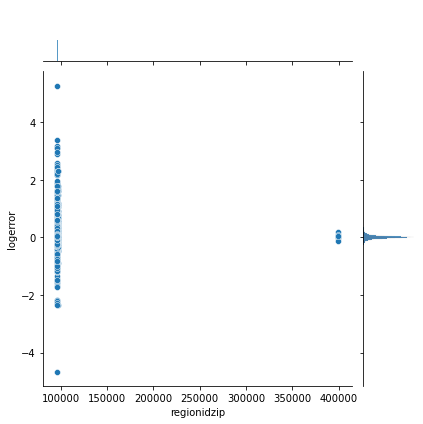

In [58]:
sns.jointplot(x='regionidzip', y='logerror', data=zillow_trim)

In [59]:
zillow_trim_highzip = zillow_trim[zillow_trim.regionidzip > 350000]

In [64]:
zillow_trim_highzip.taxvaluedollarcnt.value_counts()

707659.0     1
924794.0     1
4535969.0    1
4548320.0    1
753001.0     1
719700.0     1
3084328.0    1
150916.0     1
524894.0     1
1591558.0    1
Name: taxvaluedollarcnt, dtype: int64

In [66]:
zillow_trim[zillow_trim.regionidzip < 300000].taxvaluedollarcnt.value_counts()

450000.0    28
315000.0    25
300000.0    24
355000.0    23
270000.0    22
            ..
270042.0     1
740405.0     1
88890.0      1
262587.0     1
49546.0      1
Name: taxvaluedollarcnt, Length: 25594, dtype: int64

In [67]:
zillow_trim.transactiondate.value_counts()

2017-06-30    549
2017-04-28    442
2017-05-31    395
2017-07-28    386
2017-03-31    383
             ... 
2017-04-16      1
2017-08-12      1
2017-06-04      1
2017-07-22      1
2017-09-21      1
Name: transactiondate, Length: 246, dtype: int64

In [ ]:
sns.jointplot(x='transactiondate', y='logerror', data=zillow_trim)

In [ ]:
sns.jointplot(x='transactiondate', y='logerror', data=zillow_2)

<AxesSubplot:xlabel='fips', ylabel='logerror'>

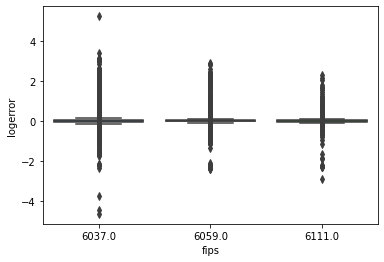

In [104]:
sns.boxplot(x='fips', y='logerror', data=zillow_2)

In [ ]:
sns.boxplot(x='fips', y='taxvaluedollarcnt', data=zillow_2)

In [83]:
zillow_trim_zips = zillow_trim[(zillow_trim.regionidzip > 95000) & (zillow_trim.regionidzip < 98000)]

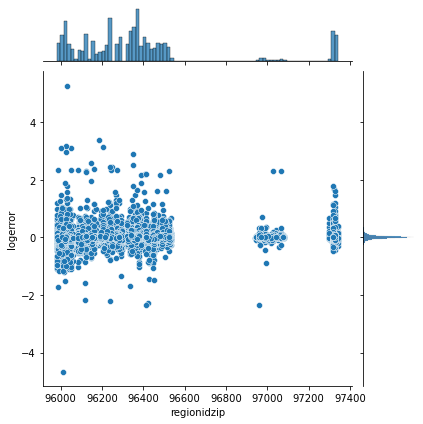

In [84]:
sns.jointplot(x='regionidzip', y='logerror', data=zillow_trim_zips)

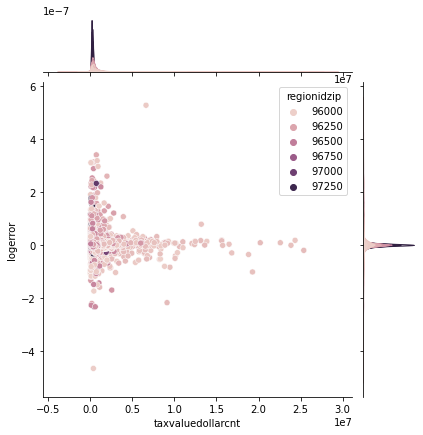

In [85]:
sns.jointplot(x='taxvaluedollarcnt', y='logerror', data=zillow_trim_zips, hue='regionidzip')

In [92]:
zillow_2 = zillow[['fips', 'logerror', 'taxvaluedollarcnt', 'transactiondate', 'regionidzip']]

In [93]:
zillow_2.head()

,fips,logerror,taxvaluedollarcnt,transactiondate,regionidzip
0,6059.0,0.025595,1023282.0,2017-01-01,96978.0
1,6111.0,0.055619,464000.0,2017-01-01,97099.0
2,6059.0,0.005383,564778.0,2017-01-01,97078.0
3,6037.0,-0.103410,145143.0,2017-01-01,96330.0
4,6037.0,0.006940,119407.0,2017-01-01,96451.0


In [88]:
zillow_2.isnull().sum()

fips                 0
logerror             0
taxvaluedollarcnt    1
transactiondate      0
dtype: int64

In [90]:
zillow_2 = zillow_2.dropna()

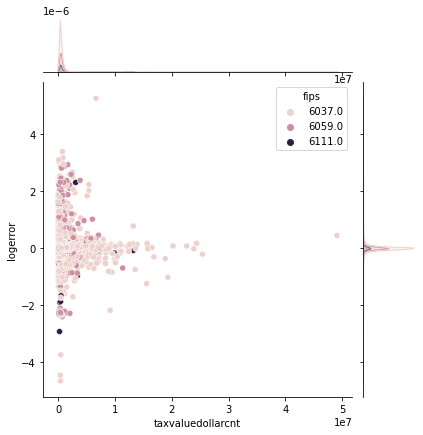

In [91]:
sns.jointplot(x='taxvaluedollarcnt', y='logerror', data=zillow_2, hue='fips')

In [97]:
zillow_2.transactiondate.value_counts()

2017-06-30    1194
2017-04-28     917
2017-05-31     868
2017-07-28     815
2017-08-31     782
              ... 
2017-03-12       1
2017-07-22       1
2017-08-05       1
2017-08-06       1
2017-09-25       1
Name: transactiondate, Length: 264, dtype: int64

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

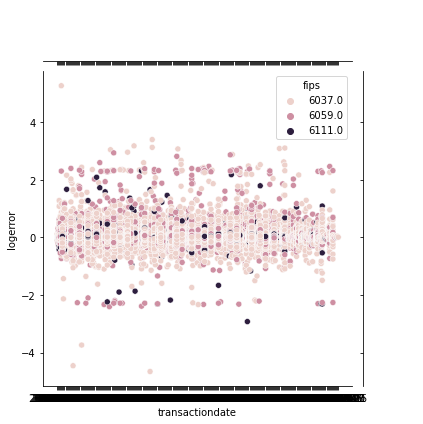

In [103]:
sns.jointplot(x='transactiondate', y='logerror', data=zillow_2, hue='fips')

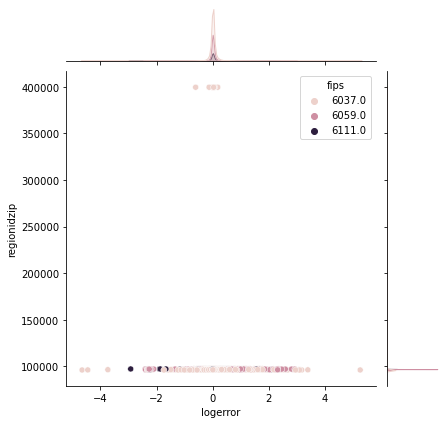

In [108]:
sns.jointplot(x='logerror', y='regionidzip', data=zillow_2, hue='fips')

In [111]:
zillow_2.fips

0        6059.0
1        6111.0
2        6059.0
3        6037.0
4        6037.0
          ...  
77569    6037.0
77570    6037.0
77571    6111.0
77572    6037.0
77573    6037.0
Name: fips, Length: 77574, dtype: float64